Wahyu Agung Sugimartanto

(wahyuagungs@gmail.com / wahyu.sugimartanto@monash.edu)

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Linear Regression
### Create Dummy data
First we need to generate 100 samples dummy data using uniform random distribution function. This data will be in range [0,1] ($runif \in [0,1]$), we scale up the data 100x.

In [2]:
# 100 samples uniform data
runif = np.random.uniform(size=100)
X = runif * 100

Next, we determine our coefficient a and b, and use linear function to create Y data. However, we also need to introduce noise in our data. These noises are generated in normally distributed scaled up 10x.

In [3]:
# a and b coefficients
a,b = 2,3
# generate noise data
noise = np.random.normal(size=100) * 10
# generate Y data
Y = (a*X) + b + noise

Since both X and Y data are in the form of ndArray (Numpy Array) we do not need to convert them into one. We can plot the distribution.

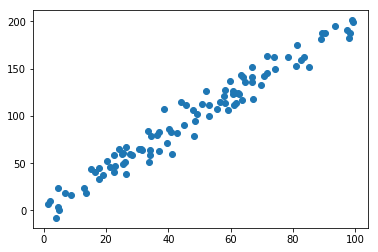

In [4]:
# Plot the data
plt.scatter(X, Y)
plt.show()

As it can be seen, the data is somewhat linear.
### Linear Regression Formula

\begin{gather*}
a=\frac{\sum y_{i} x_{i} \ -\ \overline{y}\sum x_{i}}{\sum x^{2}_{i} -\overline{x}\sum x_{i}}\\
b=\frac{\overline{y}\sum x^{2}_{i} -\overline{x}\sum y_{i} x_{i}}{\sum x^{2}_{i} -\overline{x}\sum x_{i}}
\end{gather*}
Now we can make the regression with this
\begin{equation*}
\hat{y} \ =\ ax\ +\ b
\end{equation*}

We can write the formula above as below:

In [5]:
# compute the denominator as d
d = np.sum(X*X) - (X.mean() * np.sum(X))
# compute a and b coefficients
a_reg = (np.sum(X * Y) - Y.mean()*np.sum(X))/d
b_reg = (Y.mean() * np.sum(X * X) - X.mean() * np.sum(X * Y) )/ d

Now, we can write our linear model as follow:

In [6]:
print("Y = {0}x + {1}".format(a_reg,b_reg))

Y = 1.9821389180942282x + 3.058073385686195


The last step is to fit our model line.

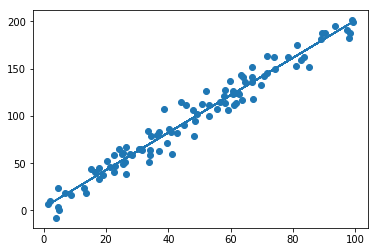

In [7]:
# compute the y_hat
Y_hat = Yhat = a_reg*X + b_reg

# Plot the X, Y and Y_hat in one figure
plt.scatter(X, Y)
plt.plot(X, Y_hat)
plt.show()


## Cosine Similarity
Cosine similarity takes form of
\begin{equation*}
sim( d_{j} ,q) \ =\frac{\sum ^{m}_{i=1} \ w_{ij} q_{i}}{\sqrt{\sum \ w^{2}_{ij}} \ \sqrt{\sum \ q^{2}_{i}}}
\end{equation*}
First, we create 6 dummy vector data and 1 query vector. 

In [8]:
# create dummy data
d1 = np.array([0.3,0.7,0])
d2 = np.array([0.5,0.8,0.3])
d3 = np.array([2.7,0.5,0.5])
d4 = np.array([1.2,0.5,0.8])
d5 = np.array([1.5,0.75,0.8])
d6 = np.array([1.6,2.0,0])
q1 = np.array([0,1,1])

documents = {'d1':d1,'d2':d2,'d3':d3,'d4':d4,'d5':d5,'d6':d6}

Next, we write a function called `cosine_sim()` to compute the degree of similarity for each document with respect to the query vector.

In [9]:
# returns a degree of similarity between a document and query vector
def cosine_sim(w,q):
    return w.dot(q)/ (np.sqrt(w.dot(w)) * np.sqrt(q.dot(q)))
    

Cosine similarity is a measure how close the document with the query; hence the higher the score the more its similarity. As a bonus, we will make a rank function to sort the result in descending order.

In [10]:
def ranked_similarity(docs, q):
    results = {k: cosine_sim(v,q) for k,v in docs.items()}
    sorted_by_value = sorted(results.items(), key=lambda kv: kv[1], reverse=True)
    return sorted_by_value

ranked_similarity(documents,q1)

[('d2', 0.7857142857142857),
 ('d1', 0.6499336836196815),
 ('d4', 0.6022133709957033),
 ('d5', 0.5898612362745811),
 ('d6', 0.5521576303742327),
 ('d3', 0.25334729596906996)]

## Rocchio Algorithm
Rocchio Algorithm takes a formula as follow:

\begin{equation*}
Q'\ \ =\ \alpha Q\ +\ \beta \ \left(\frac{1}{N_{rel}} \ \sum _{i_{1} \ \in \ rel} \ D_{i_{1}}\right) \ -\gamma \left(\frac{1}{N_{non-rel}} \ \sum _{i_{2} \in \ non-rel} \ D_{i_{2}}\right)
\end{equation*}

Next, we will write a function to depict the formula as above.

In [11]:
def rocchio(query, relevants, non_relevants,alpha=1, beta=0.5, gamma=0.25):
    alpha_vector = (alpha * query)
    beta_vector = (beta * np.sum(np.array([x for x in relevants]),axis=0)/len(relevants))
    gamma_vector = (gamma * np.sum(np.array([x for x in non_relevants]),axis=0)/len(non_relevants))
    return  alpha_vector + beta_vector - gamma_vector
                

Suppose from the documents above, we determine that **d2, d3, d5, and d6 are relevant** documents. While **d1 and d4 are non-relevant** documents. We can compute the new query vector.

In [12]:
# determine the relevant and non-relevant document lists
rel = [d2,d3,d5,d6]
non_rel = [d1,d4]

# compute the new vector
q_hat = rocchio(q1,rel,non_rel)

# print the new vector
print(q_hat)

[0.6     1.35625 1.1    ]
